### Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import pickle

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for modelling
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#performance
from sklearn.metrics import mean_squared_error

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Installing pyarrow for reading parquet files
!pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importing Google colab and drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing dataset

In [101]:
# training dataset

df1 = pd.read_parquet('/content/drive/MyDrive/MLOPs/yellow_tripdata_2022-01.parquet')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [100]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333


In [99]:
# testing dataset

df2 = pd.read_parquet('/content/drive/MyDrive/MLOPs/yellow_tripdata_2022-02.parquet')
df2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,17.00,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,21.00,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,35.50,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,28.00,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,35.50,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979426,2,2022-02-28 23:50:00,2022-03-01 00:06:00,NaN,3.40,NaN,None,163,193,0,14.37,0.00,0.5,0.00,0.00,0.3,17.67,NaN,NaN
2979427,2,2022-02-28 23:06:57,2022-02-28 23:19:12,NaN,3.48,NaN,None,141,4,0,14.51,0.00,0.5,2.00,0.00,0.3,19.81,NaN,NaN
2979428,2,2022-02-28 23:48:13,2022-03-01 00:03:33,NaN,3.05,NaN,None,161,151,0,14.38,0.00,0.5,3.81,0.00,0.3,21.49,NaN,NaN
2979429,2,2022-02-28 23:56:41,2022-03-01 00:04:57,NaN,2.62,NaN,None,141,226,0,12.53,0.00,0.5,1.71,0.00,0.3,17.54,NaN,NaN


### Question 1: Read the data for January. How many columns are there?

In [102]:
# Checking the shape of the January 2022 dataset

df1.shape[1]

19

Ans: There are 19 columns in the dataset 

### Question 2: Now let's compute the duration variable. It should contain the duration of a ride in minutes. What's the standard deviation of the trips duration in January?

In [103]:
# Computing the duration column of the January data

df1['duration'] = df1.tpep_dropoff_datetime - df1.tpep_pickup_datetime
df1.duration = df1.duration.apply(lambda td: td.total_seconds() / 60)

df2['duration'] = df2.tpep_dropoff_datetime - df2.tpep_pickup_datetime
df2.duration = df2.duration.apply(lambda td: td.total_seconds() / 60)

In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [126]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979431 entries, 0 to 2979430
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [104]:
# Getting statistical properties of  duration column 

round(df1['duration'].describe(), 2)

count    2463931.00
mean          14.21
std           46.45
min        -3442.40
25%            6.32
50%           10.18
75%           16.17
max         8513.18
Name: duration, dtype: float64

Ans: The standard deviation of the duration column is 46.45 minutes 

### Question 3: Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive). What fraction of the records left after you dropped the outliers?

In [116]:
# Removing outliers from training set

data1 = df1[(df1.duration >= 1) & (df1.duration <= 60)]
data2 = df2[(df2.duration >= 1) & (df2.duration <= 60)]
fraction_1 = (data1.shape[0]/df1.shape[0]) * 100
round(fraction_1, 0)

98.0

Ans: 98%

### Question 4: Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [117]:
# Selcting Pickup and drop off locations as the only categorical variables

categorical = ['PULocationID', 'DOLocationID']
data1[categorical] = data1[categorical].astype(str)
data2[categorical] = data2[categorical].astype(str)

In [118]:
# Fitting a dictionary vectorizer

dv = DictVectorizer()
train_dicts = data1[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = data2[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [119]:
X_train

<2421440x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

**Ans: There are 515 columns after one hot encoding.**

In [120]:
# Selcting duration as the target variable for the training and validation sets

target = 'duration'
y_train = data1['duration'].values
y_val = data2['duration'].values
y_train

array([17.81666667,  8.4       ,  8.96666667, ..., 11.        ,
       12.05      , 27.        ])

In [121]:
y_val

array([12.43333333, 17.55      , 23.65      , ..., 15.33333333,
        8.26666667,  6.        ])

In [122]:
# Fitting a linear model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Question 5: Now let's use the feature matrix from the previous step to train a model.
Train a plain linear regression model with default parameters
Calculate the RMSE of the model on the training data

What's the RMSE on train?

In [129]:
# checking the RMSE of the linear model on train set

y_pred_train = lr.predict(X_train)
mean_squared_error(y_train, y_pred_train, squared=False)

6.986190742248472

**Ans: The RMSE on train is 6.99 minutes**

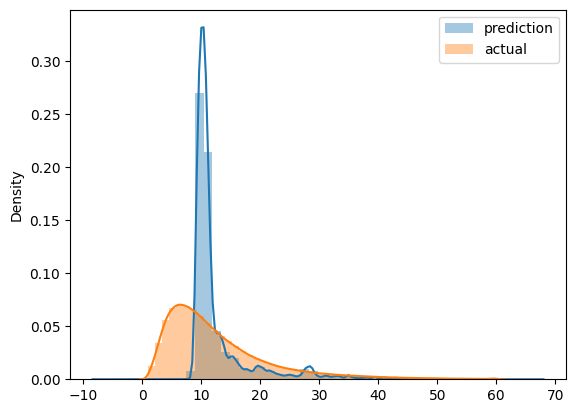

In [113]:
sns.distplot(y_pred_train, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

### Question 6: Now let's apply this model to the validation dataset (February 2022).

What's the RMSE on validation?

In [130]:
y_pred_val = lr.predict(X_val)
mean_squared_error(y_val, y_pred_val, squared=False)

7.78640662117552

**Ans: The RMSE on validation is 7.79 minutes**

<Axes: ylabel='Density'>

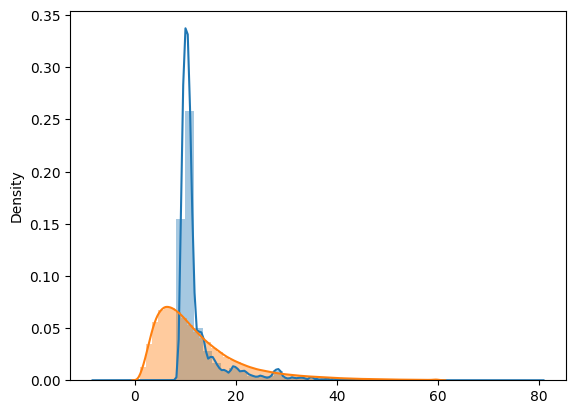

In [131]:
sns.distplot(y_pred_val, label='prediction')
sns.distplot(y_train, label='actual')